# <center>Лабораторна робота за темою: 'Візуалізація даних за допомогою Python'

#### Імпортуємо необхідні бібліотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import contextily as ctx
from shapely.geometry import Point
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")

### <b>Завдання A.</b> Завантажте [за посиланням](https://docs.google.com/spreadsheets/d/1g7P8nuqvIEmRwBfur3ncx7HhtGhy4Pp-8TZctSFe8vw/edit?gid=1836534907#gid=1836534907) набір даних про об’єктах нерухомості, проданих в окрузі King County (Вашингтон, США) в період з травня 2014 по травень 2015 року. Детальніше про цих даних можна, можливо прочитати [тут](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction).
### <b>Завдання B.</b> Збережіть дані у вигляді датафрейму Pandas (попередньо необхідно завантажити дані у форматі CSV, TSV або Excel).

In [2]:
df = pd.read_csv(r'C:\python_labs\Visualization\house_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
dtypes: flo

#### Перевірка на наявність пустих значень у датасеті

In [3]:
df.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### <b>Висновок:</b> у датасеті немає пропущених значень

### <b>Завдання C.</b> Зобразіть розподіл цін на будинку (стовпець <b>price</b>) у вигляді гістограми. Підберіть кількість інтервалів (bins) експериментально. Додати підпис до осі Ox та назва графіка.

#### Використання бібліотеки  <b>matplotlib</b>

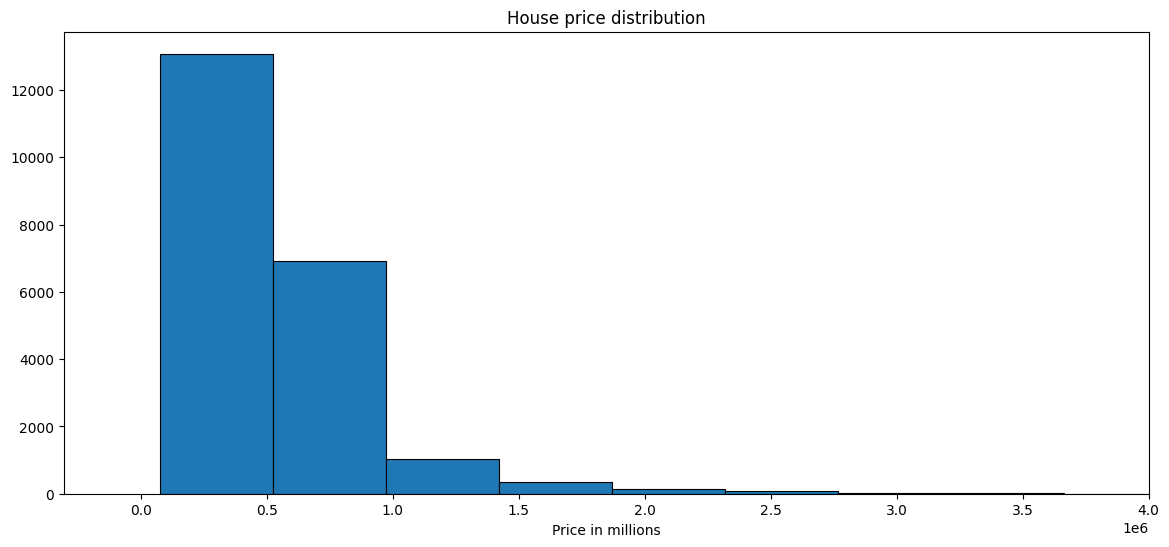

In [4]:
fig, ax = plt.subplots(figsize=(14,6))

ax.hist(x=df['price'], bins=17, edgecolor='black', linewidth=0.8)

ax.set_xlabel('Price in millions')
ax.set_title('House price distribution')
plt.xlim(right=4e6)


plt.show()

#### Використання бібліотеки <b>seaborn</b>

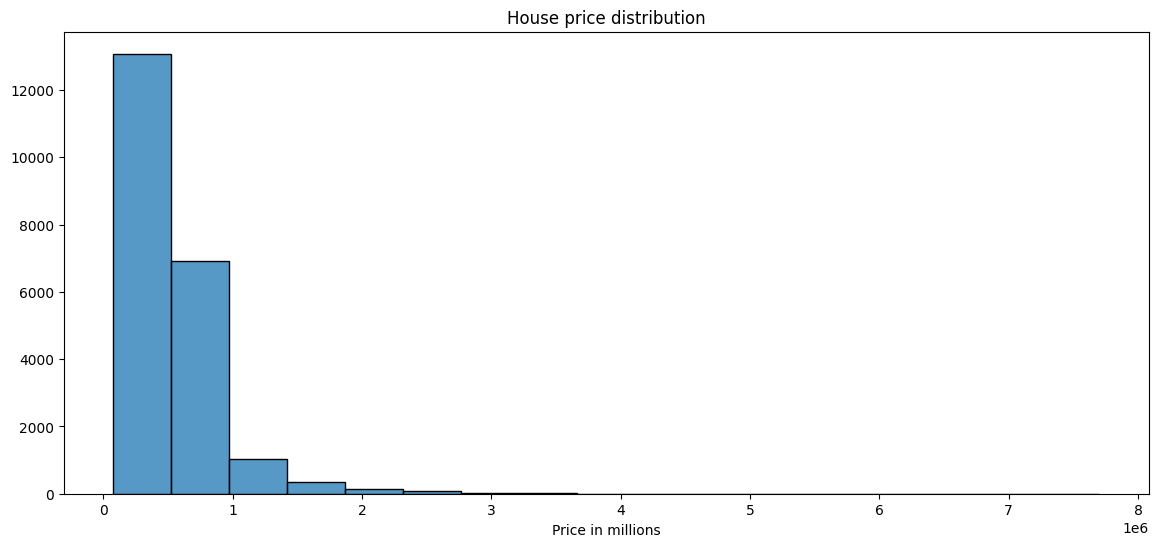

In [5]:
plt.figure(figsize=(14,6))

sns.histplot(data=df,x='price',bins=17)

plt.xlabel('Price in millions')
plt.ylabel('')
plt.title('House price distribution')

plt.show()#настроить ось x, without 1e6

#### <b>Висновок:</b> найбільша кількість нерухомості має вартість до 1 мільйона доларів

### <b>Завдання D.</b> Побудуйте графік для візуалізації співвідношення загальної житловий площі (<b>sqft_living</b>) та ціни (<b>price</b>). Задайте параметри графіка:
- підписи до осей, назва графіка ;
- тип маркера: circle; розмір: 20; колір: зелений.


#### Використання бібліотеки  <b>matplotlib</b>

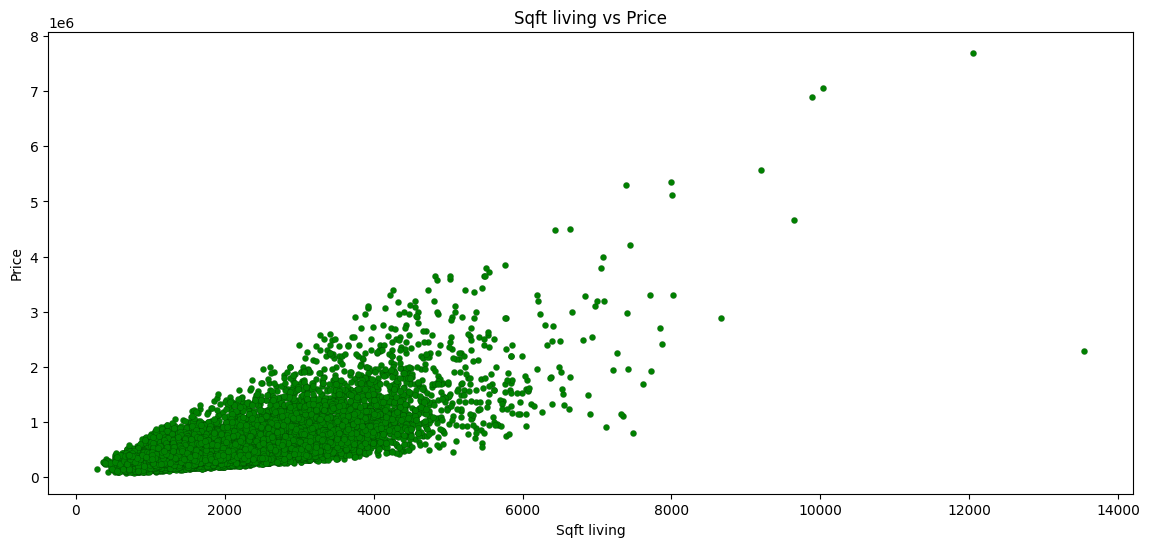

In [6]:
fig, ax = plt.subplots(figsize=(14,6))

ax.scatter(x=df['sqft_living'],y=df['price'],c='g',s=20, edgecolor='black', linewidth=0.1) 

ax.set_xlabel('Sqft living')
ax.set_ylabel('Price')
ax.set_title('Sqft living vs Price')

plt.show()

#### Використання бібліотеки <b>seaborn</b>

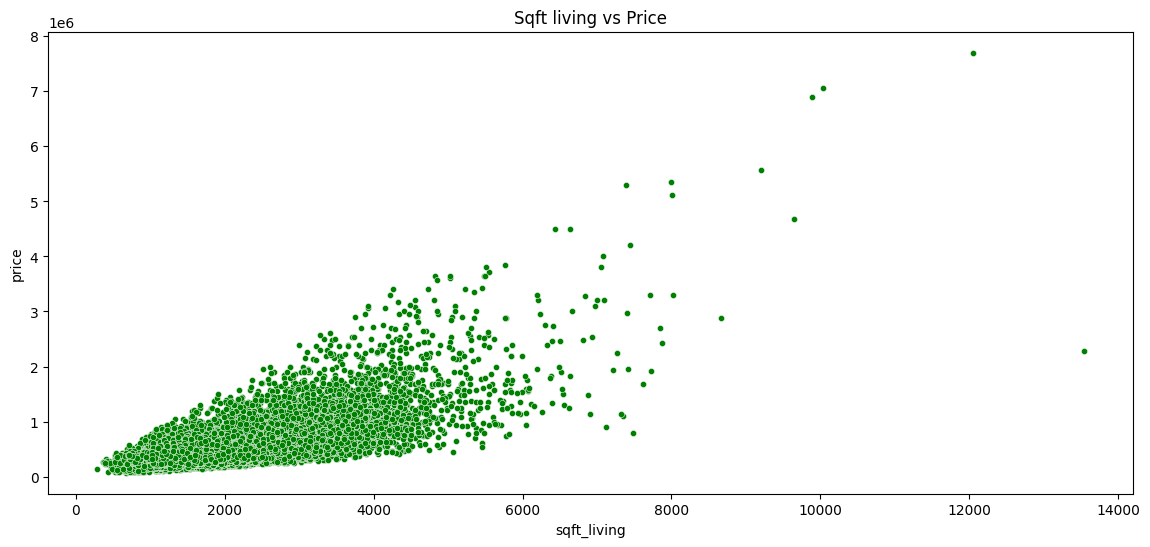

In [7]:
plt.figure(figsize=(14,6))

sns.scatterplot(data=df, x='sqft_living', y='price', s=20, color='g')

plt.title('Sqft living vs Price')

plt.show()

#### <b>Висновок:</b> з графіків видно, що зі збільшенням загальної житлової площі ціна теж зростатиме.

### <b>Завдання E.</b> Доповніть параметри попереднього графіка, щоб показати наявність / відсутність виду на море (стовпець <b>waterfront</b>). Зробіть розбиття на групи по ознакою <b>waterfront</b> шляхом поділу на два графіка.

#### Використання бібліотеки  <b>matplotlib</b>

##### Створюю 2 окремих датафрейми за ознакою <b>waterfront</b>

In [8]:
df_without_waterfront = df[df['waterfront']==0]
df_with_waterfront = df[df['waterfront']==1]

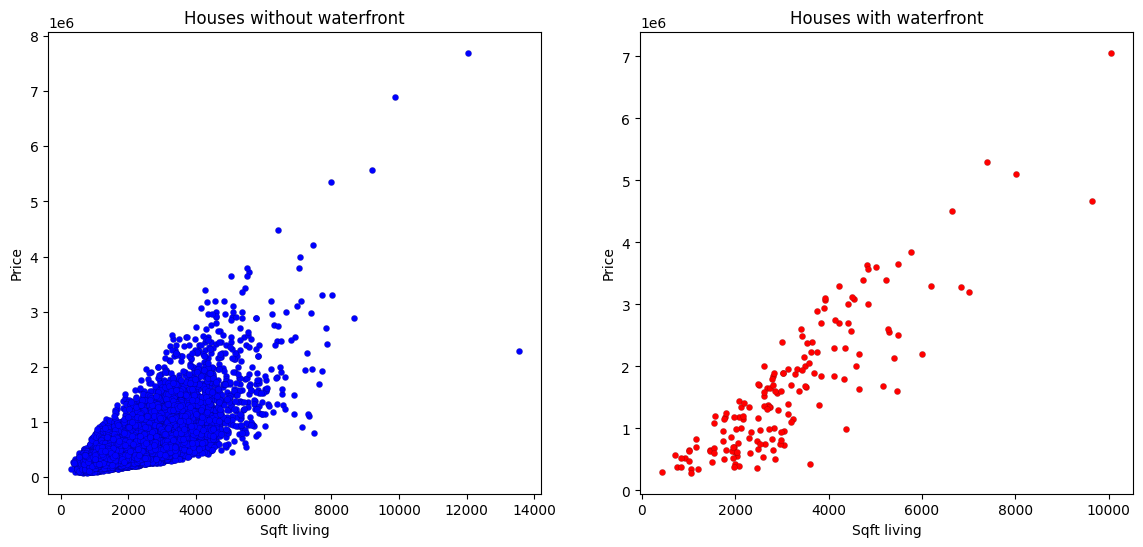

In [9]:
fig, ax = plt.subplots(1,2, figsize=(14,6))

ax[0].scatter(x=df_without_waterfront['sqft_living'],y=df_without_waterfront['price'],c ='b',s=20, edgecolor='black', linewidth=0.1)
ax[0].set_xlabel('Sqft living')
ax[0].set_ylabel('Price')
ax[0].set_title('Houses without waterfront')

ax[1].scatter(x=df_with_waterfront['sqft_living'],y=df_with_waterfront['price'],c ='r',s=20, edgecolor='black', linewidth=0.1)
ax[1].set_xlabel('Sqft living')
ax[1].set_ylabel('Price')
ax[1].set_title('Houses with waterfront')

plt.show()

#### Використання бібліотеки <b>seaborn</b>

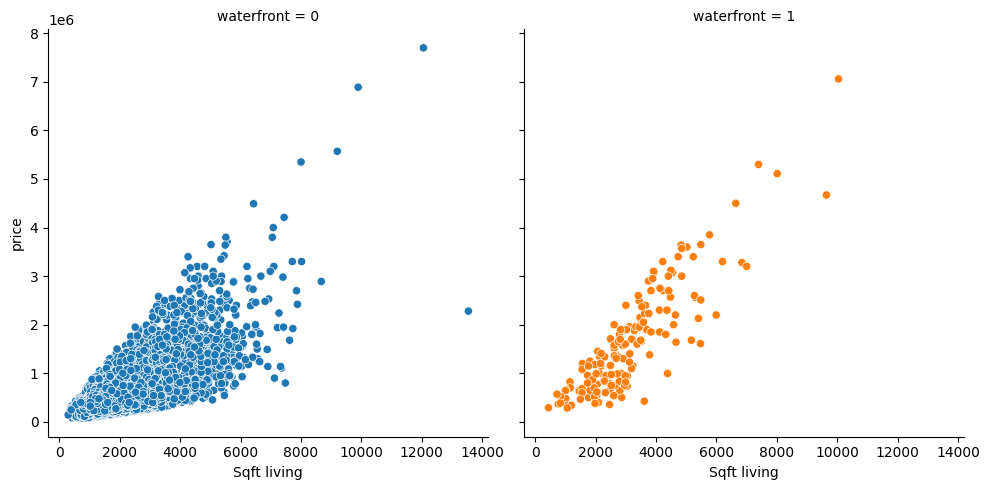

In [10]:
g = sns.relplot(data=df, x='sqft_living', y='price', kind='scatter', hue='waterfront', col='waterfront', legend=False)

g.set_axis_labels("Sqft living")

plt.show()

#### <b>Висновок:</b> з отриманих графіків можна сказати, що:
1. Кількість нерухомостей без виду на море набагато більше, ніж із ним.
2. Ціна на нерухомість з видом на море зростає більш стрімко зі зростанням площі, ніж без виду.

### <b>Завдання F.</b> Зобразіть розподіл року будівлі дому (yr _built). Задайте параметри графіка.

#### Використання бібліотеки  <b>matplotlib</b>

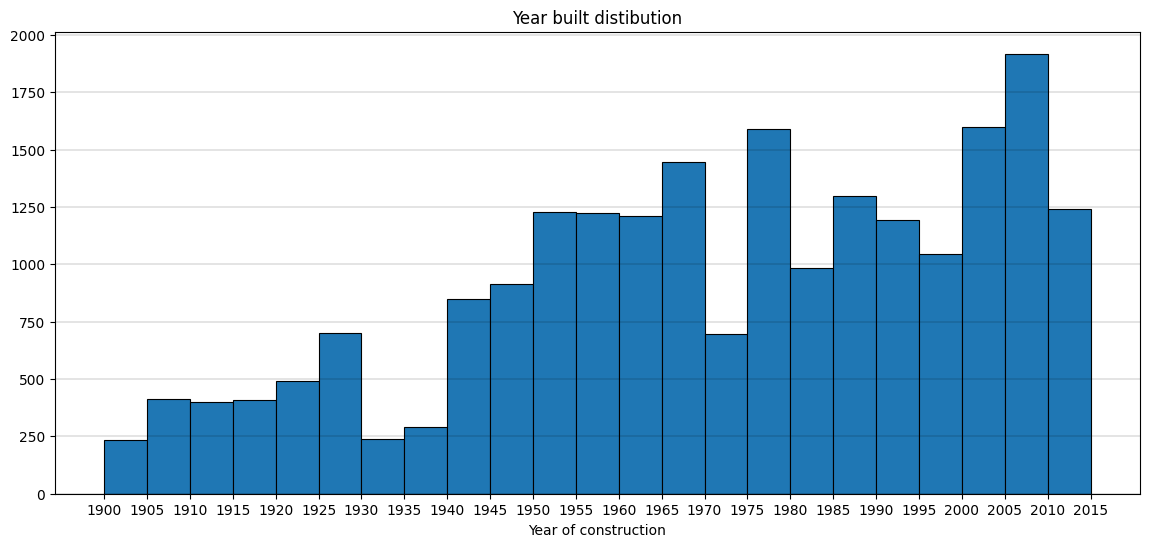

In [11]:
fig, ax = plt.subplots(figsize=(14,6))

ax.hist(x=df['yr_built'], bins=23, edgecolor='black', linewidth=0.8)
ax.set_xlabel('Year of construction')
ax.set_title('Year built distibution')

ax.set_xticks(range(1900,2016,5))

plt.grid(axis='y', color='black', linewidth=0.15)

plt.show()

#### Використання бібліотеки <b>seaborn</b>

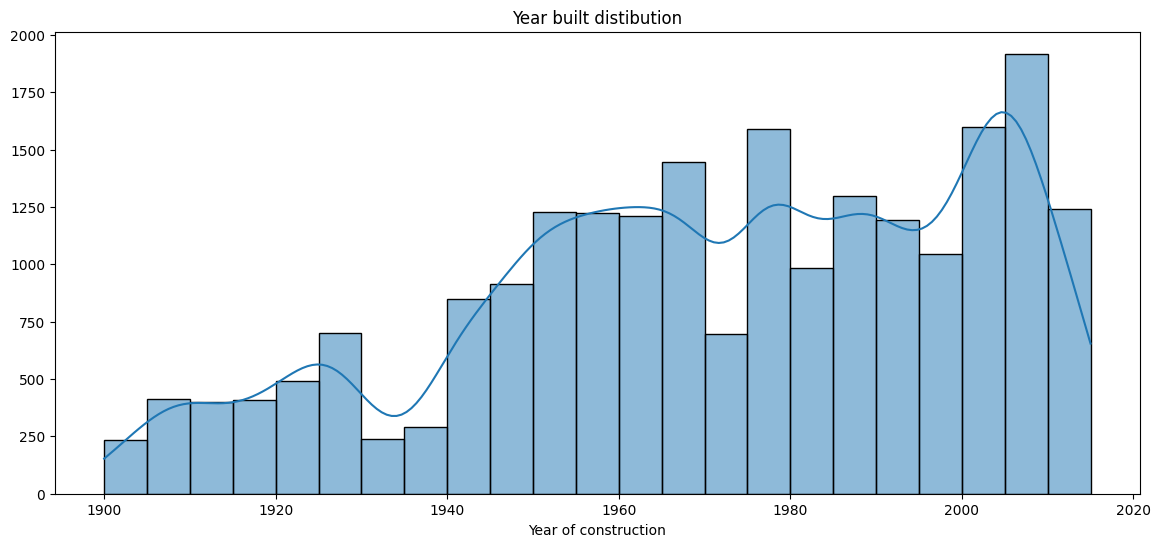

In [12]:
plt.figure(figsize=(14,6))
sns.histplot(data=df, x='yr_built',bins=23, kde=True)

plt.xlabel('Year of construction')
plt.ylabel('')
plt.title('Year built distibution')

plt.show()#сделано

### <b>Завдання G.</b> Зобразіть розподіл кількості будинків по загальної оцінки (grade).

#### Використання бібліотеки  <b>matplotlib</b>

In [13]:
df['grade'].value_counts()

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

##### Оскільки кількість оцінок 1 та 3 дуже низька, то не будемо у графіку відображати

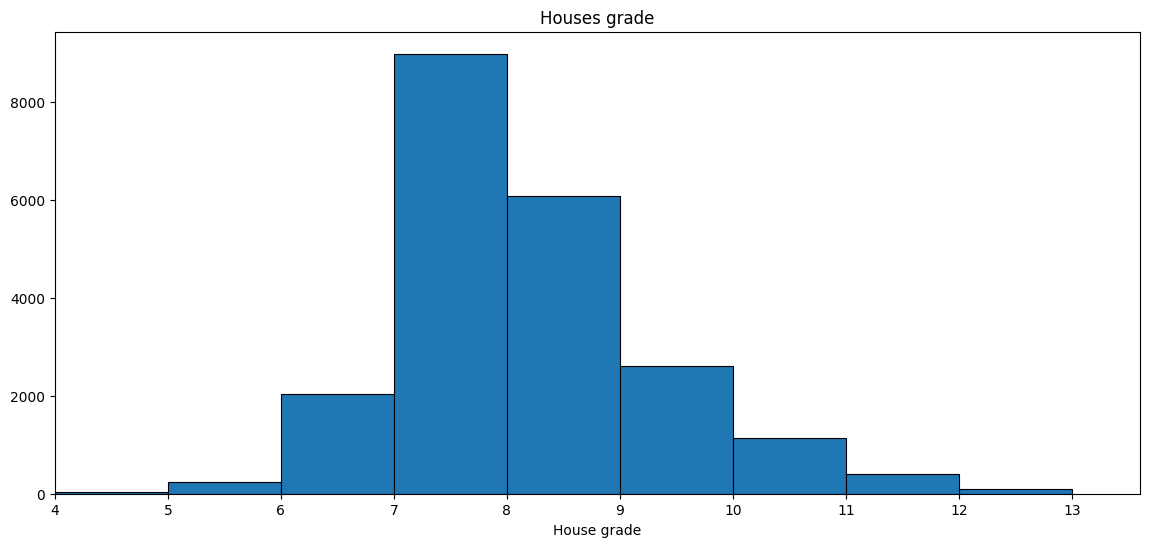

In [14]:
fig, ax = plt.subplots(figsize=(14,6))

ax.hist(x=df['grade'], bins=12, edgecolor='black', linewidth=0.8)

ax.set_xlabel('House grade')
ax.set_title('Houses grade')
ax.set_xticks(range(1,14))

plt.xlim(left=4)

plt.show()

#### Використання бібліотеки <b>seaborn</b>

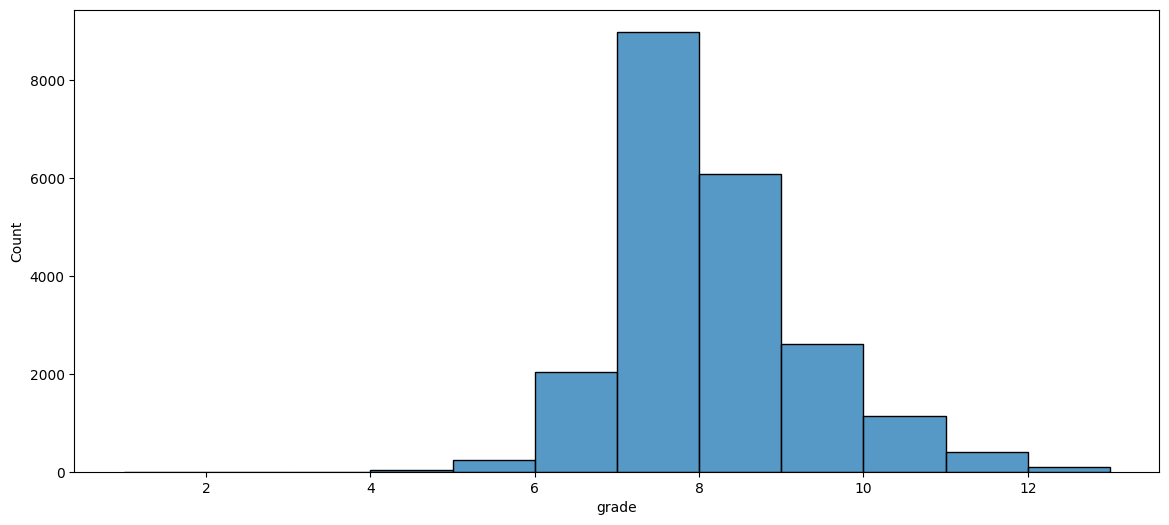

In [15]:
plt.figure(figsize=(14,6))

sns.histplot(data=df,x='grade',bins=12)

plt.show()

### <b>Завдання H.</b> Зобразіть співвідношення між загальної оцінкою дому (<b>grade</b>) та середньої ціною будинків з даною оцінкою (перед цим необхідно зробити відповідні обчислення).

In [16]:
mean_price = df.groupby('grade')['price'].mean()
mean_price

grade
1     1.420000e+05
3     2.056667e+05
4     2.143810e+05
5     2.485240e+05
6     3.019166e+05
7     4.025933e+05
8     5.428955e+05
9     7.737382e+05
10    1.072347e+06
11    1.497792e+06
12    2.192500e+06
13    3.710769e+06
Name: price, dtype: float64

#### Використання бібліотеки  <b>matplotlib</b>

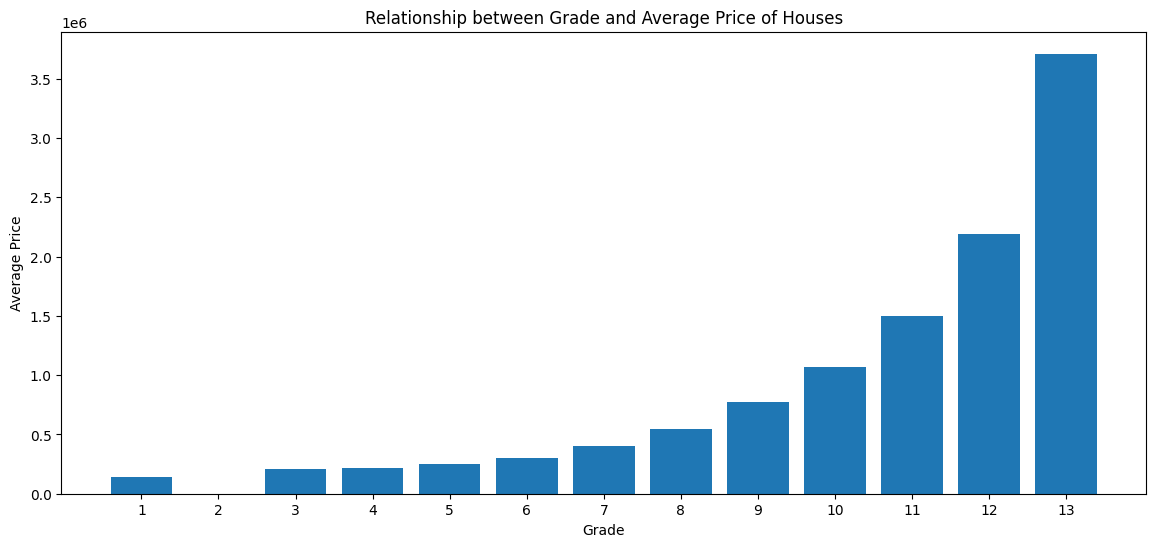

In [17]:
fig, ax = plt.subplots(figsize=(14,6))

ax.bar(mean_price.index, mean_price.values)

ax.set_xlabel('Grade')
ax.set_ylabel('Average Price')
ax.set_title('Relationship between Grade and Average Price of Houses')
ax.set_xticks(range(1,14))

plt.show()

#### Використання бібліотеки <b>seaborn</b>

##### Оскільки для функції barplot потрібен DataFrame, то для mean_price зробимо це перетворення

In [18]:
mean_price_df = pd.DataFrame({'grade':mean_price.index,'mean_price':mean_price.values})

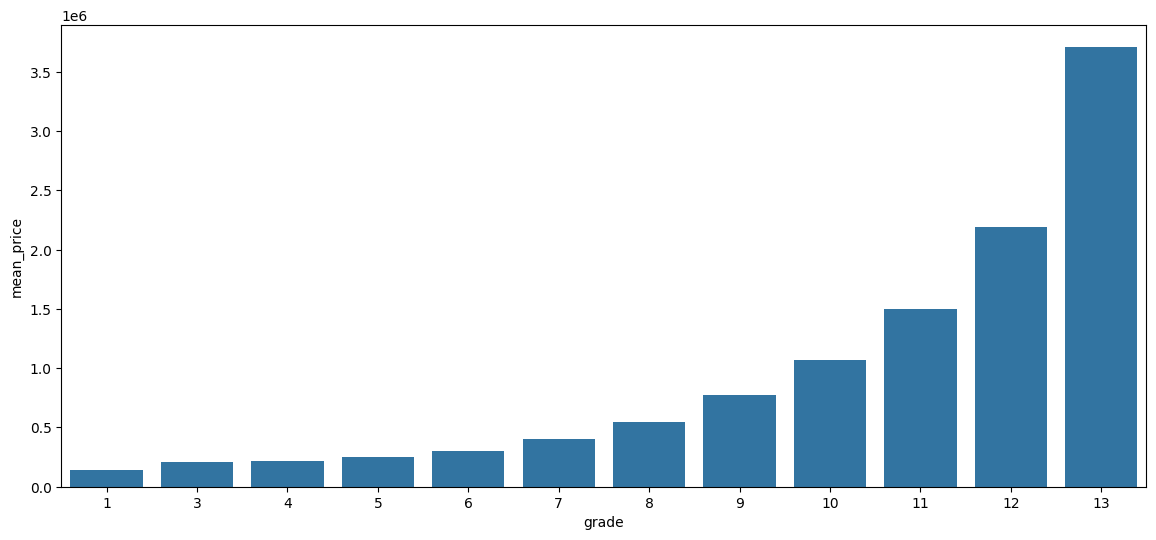

In [19]:
plt.figure(figsize=(14,6))

sns.barplot(data=mean_price_df, x='grade', y='mean_price')

plt.show()

### <b>Завдання I.</b> Зобразіть на двох сусідніх графіки (за загальною віссю Oy) розподіл будинків по кількості спалень (<b>bedrooms</b>) та ванних кімнат кімнат (<b>bathrooms</b>).

#### Використання бібліотеки  <b>matplotlib</b>

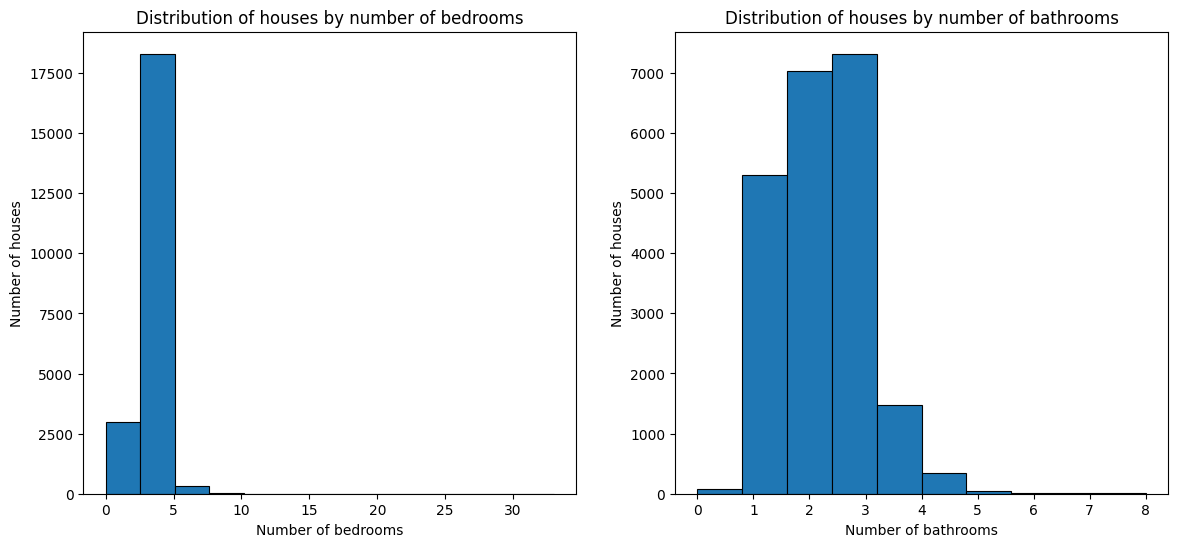

In [20]:
fig, ax = plt.subplots(1,2,figsize=(14,6))

ax[0].hist(x=df['bedrooms'],bins=13, edgecolor='black', linewidth=0.8)    
ax[0].set_title('Distribution of houses by number of bedrooms')
ax[0].set_xlabel('Number of bedrooms')
ax[0].set_ylabel('Number of houses')

ax[1].hist(x=df['bathrooms'], edgecolor='black', linewidth=0.8)    
ax[1].set_title('Distribution of houses by number of bathrooms')
ax[1].set_xlabel('Number of bathrooms')
ax[1].set_ylabel('Number of houses')

plt.show()

#### Використання бібліотеки <b>seaborn</b>

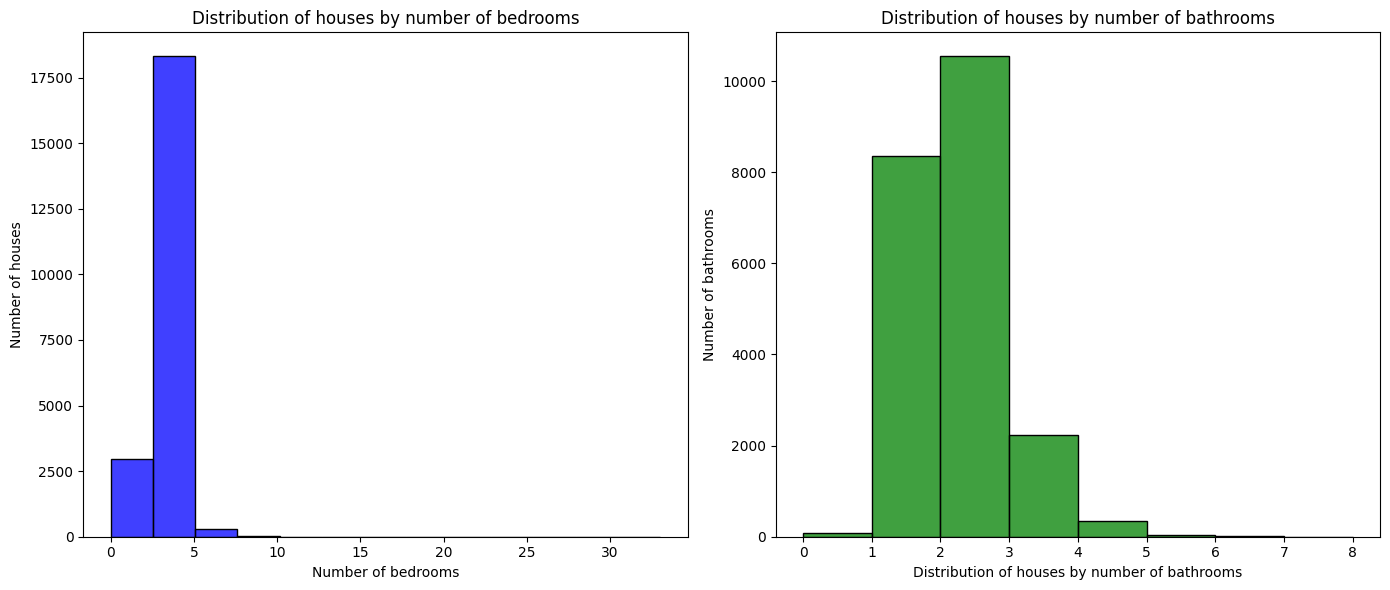

In [21]:
plt.figure(figsize=(14, 6))  

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='bedrooms', bins=13,color='blue')
plt.xlabel('Number of bedrooms')
plt.ylabel('Number of houses')
plt.title('Distribution of houses by number of bedrooms')


plt.subplot(1, 2, 2)
sns.histplot(data=df, x='bathrooms', bins=8, color='green')
plt.xlabel('Distribution of houses by number of bathrooms')
plt.ylabel('Number of bathrooms')
plt.title('Distribution of houses by number of bathrooms')

plt.tight_layout()  
plt.show()

### <b>Завдання J.</b> Залежить чи ціна будинку від його географічного розташування (широти lat і довготи long)? Подумайте над належним типом візуалізації.

##### Для візуалізації буде застосовано hexbin

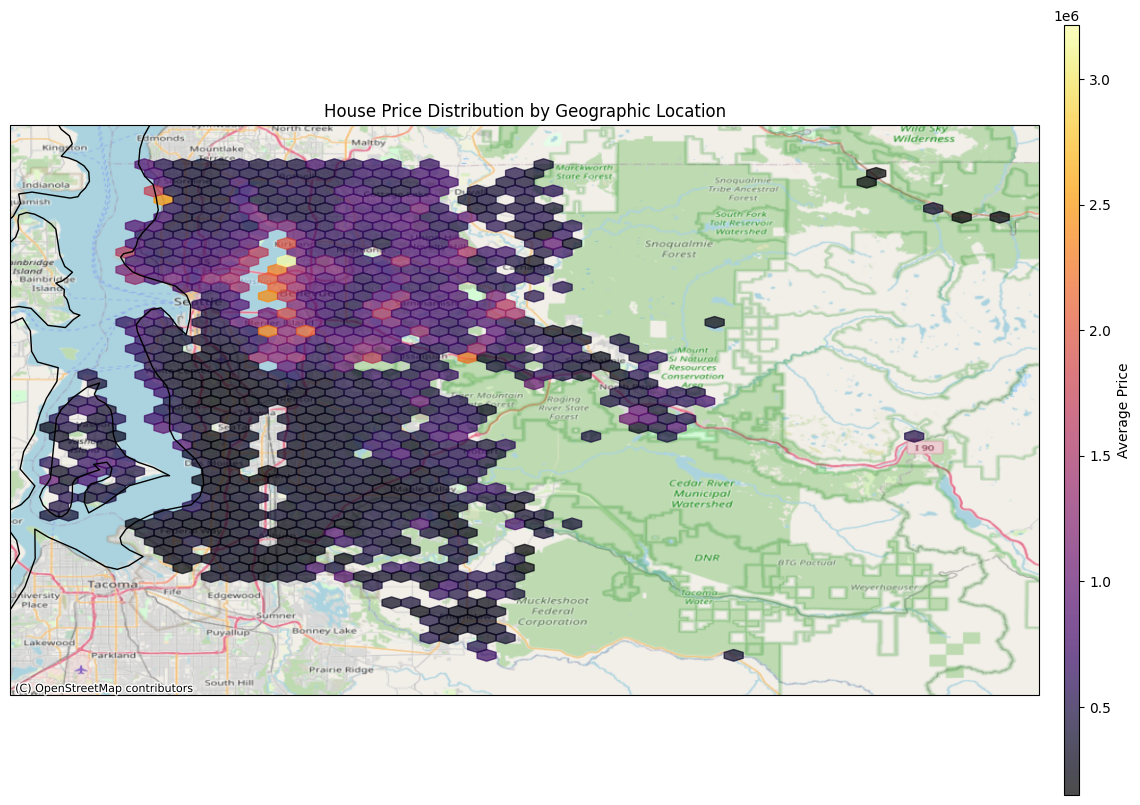

In [22]:
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

min_long, max_long = df['long'].min()-0.05, df['long'].max()+0.05
min_lat, max_lat = df['lat'].min()-0.05, df['lat'].max()+0.05

fig, ax = plt.subplots(1, 1, figsize=(16, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([min_long, max_long, min_lat, max_lat], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.7)
ax.add_feature(cfeature.RIVERS)

hb = ax.hexbin(df['long'], df['lat'], gridsize=50, C=df['price'], reduce_C_function=np.mean, cmap='inferno', transform=ccrs.PlateCarree(), alpha=0.7)

ctx.add_basemap(ax, crs=ccrs.PlateCarree(), source=ctx.providers.OpenStreetMap.Mapnik)

cbar = plt.colorbar(hb, orientation='vertical', pad=0.02, aspect=50)
cbar.set_label('Average Price')

plt.title('House Price Distribution by Geographic Location')

plt.show()


##### <b> Висновок:</b> з карти можна побачити, що найбільша середня ціна спостерігається у нерухомостей біля водойм, але варто зазначити, що це не завжди.